In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


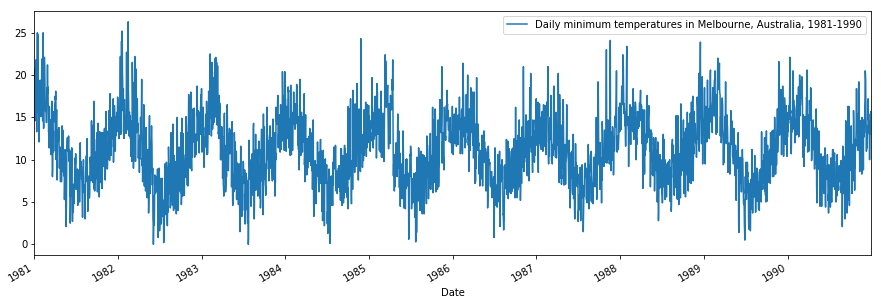

In [0]:
path = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/daily-temp.csv'

df = pd.read_csv(path, parse_dates=['Date'], index_col='Date')
df.plot(figsize=(15,5));

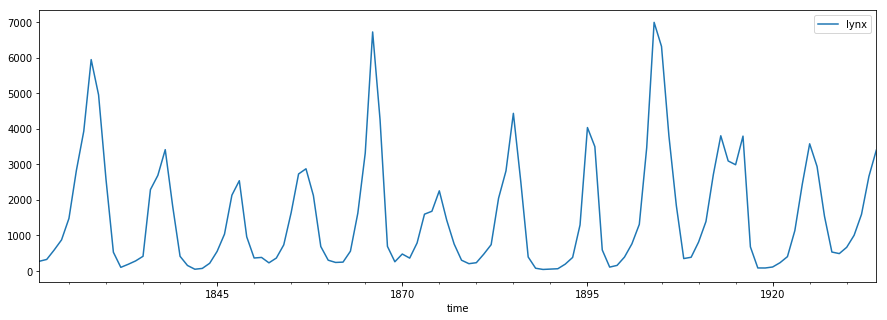

In [0]:
path_lynx = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/lynx.csv'

df = pd.read_csv(path_lynx, parse_dates=['time'], index_col='time')
df.plot(figsize=(15,5));

In [0]:
path_mauna_loa = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/mauna_loa.csv'

df = pd.read_csv(path_mauna_loa)

df.head()

,year,month,day,decimal,ppm,#days,1 yr ago,10 yr ago,since 1800
0,1974,5,19,1974.3795,333.34,6,-999.99,-999.99,50.36
1,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06
2,1974,6,2,1974.4178,332.32,5,-999.99,-999.99,49.57
3,1974,6,9,1974.4370,332.18,7,-999.99,-999.99,49.63
4,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.07


In [0]:
df['date'] = df.apply( lambda row: '{}-{}-{}'.format(int(row['year']), int(row['month']), int(row['day'])), axis=1)

In [0]:
df['date'] = pd.to_datetime(df['date'])
df.index = df['date']

In [0]:
df['date'] = pd.to_datetime(df[['year','month','day']])


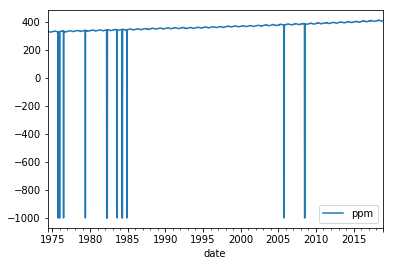

In [0]:
df[['ppm']].plot();

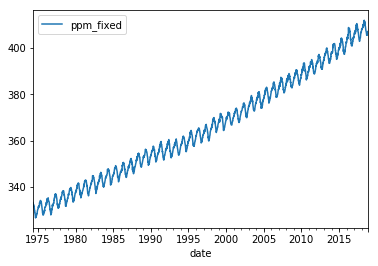

In [0]:
df['ppm_fixed'] = df['ppm'].map(lambda x: np.nan if x < 0 else x).fillna( method='backfill')
df [['ppm_fixed']].plot();

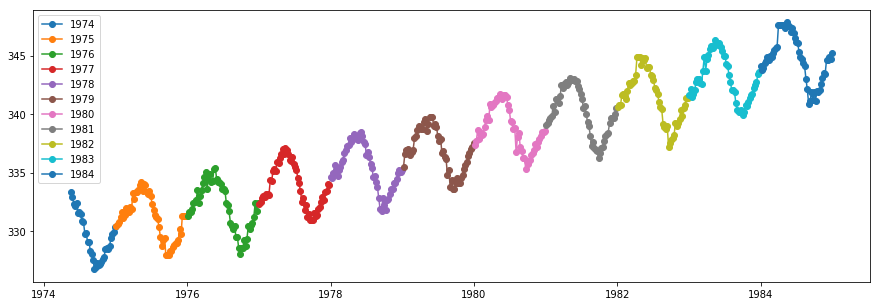

In [0]:
plt.figure(figsize=(15,5))
for year in range (1974, 1985):
  df1974 = df[df.year == year]
  plt.plot(df1974.index, df1974['ppm_fixed'],'o-',label=year)
plt.legend()